# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading datasets

In [2]:
dataTrain = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
dataTest  = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv")

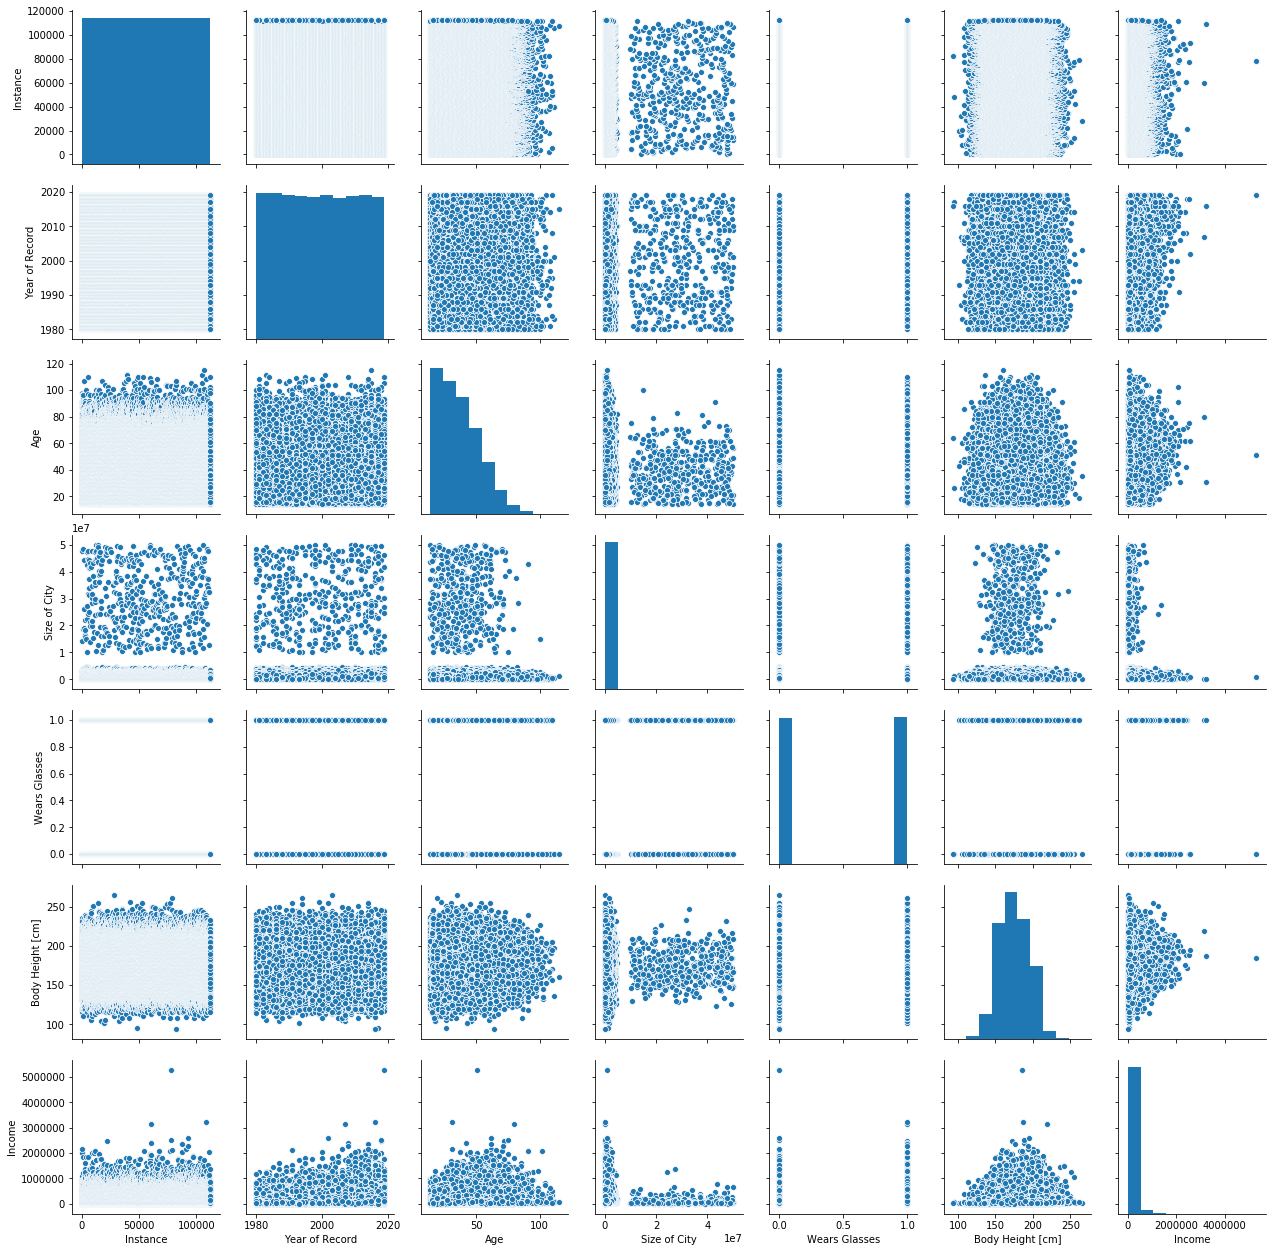

In [3]:
sns.pairplot(dataTrain, palette="husl")

In [4]:
data = dataTrain
data.corr()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income
Instance,1.000000,-0.001675,0.000484,-0.003754,0.001136,-0.001669,0.002897
Year of Record,-0.001675,1.000000,-0.002316,0.003579,-0.002111,0.002521,0.165116
Age,0.000484,-0.002316,1.000000,0.005287,-0.000694,-0.000866,0.186160
Size of City,-0.003754,0.003579,0.005287,1.000000,0.000643,-0.001780,0.014993
Wears Glasses,0.001136,-0.002111,-0.000694,0.000643,1.000000,0.007116,0.005718
Body Height [cm],-0.001669,0.002521,-0.000866,-0.001780,0.007116,1.000000,0.072889
Income,0.002897,0.165116,0.186160,0.014993,0.005718,0.072889,1.000000


# Removing least correlated columns and scaling target variable

In [5]:
del_col_list = ['Instance','Hair Color', 'Wears Glasses']
data = data.drop(del_col_list, axis=1)
data= data[data["Income"]>0]
data.info()
data["Income"] = np.log(data["Income"])

data_test_original = dataTest
del_col_list = ['Instance','Hair Color', 'Wears Glasses']
dataTest = dataTest.drop(del_col_list, axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 111827 entries, 0 to 111992
Data columns (total 9 columns):
Year of Record       111387 non-null float64
Gender               104442 non-null object
Age                  111334 non-null float64
Country              111827 non-null object
Size of City         111827 non-null int64
Profession           111506 non-null object
University Degree    104479 non-null object
Body Height [cm]     111827 non-null int64
Income               111827 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.5+ MB


# Filling NA values in columns with continuos value

In [6]:
data[["Year of Record"]] = data[["Year of Record"]].fillna(value=data["Year of Record"].mode()[0])
data[["Age"]] = data[["Age"]].fillna(value=data["Age"].mean())

dataTest[["Year of Record"]] = dataTest[["Year of Record"]].fillna(value=dataTest["Year of Record"].mode()[0])
dataTest[["Age"]] = dataTest[["Age"]].fillna(value=dataTest["Age"].mean())

# Scaling size of city

In [7]:
year_max_value = data['Size of City'].max()
year_min_value = data['Size of City'].min()
data['Size of City'] = (data['Size of City'] - year_min_value) / (year_max_value - year_min_value)

year_max_value = dataTest['Size of City'].max()
year_min_value = dataTest['Size of City'].min()
dataTest['Size of City'] = (dataTest['Size of City'] - year_min_value) / (year_max_value - year_min_value)

# Filling NA values in columns with discrete value and replacing absurd values

In [8]:
data[["Gender"]] = data[["Gender"]].fillna(value="unknownG")
data[['Gender']] = data[['Gender']].replace('0', 'unknownG') 
data[['Gender']] = data[['Gender']].replace('unknown', 'unknownG')

data[["University Degree"]] = data[["University Degree"]].fillna(data["University Degree"].mode()[0])

data[["Profession"]] = data[["Profession"]].fillna(value="unknownP")


dataTest[["University Degree"]] = dataTest[["University Degree"]].fillna(dataTest["University Degree"].mode()[0])

dataTest[["Profession"]] = dataTest[["Profession"]].fillna(value="unknownP")

dataTest[["Gender"]] = dataTest[["Gender"]].fillna(value="unknownG")
dataTest[['Gender']] = dataTest[['Gender']].replace('0', 'unknownG') 
dataTest[['Gender']] = dataTest[['Gender']].replace('unknown', 'unknownG')

# Converting discrete columns to continuos values 
## Used mean of Income for a given column index

In [9]:
groupedProf = data.groupby('Profession', as_index=False)['Income'].mean()
data['Profession'] = data['Profession'].map(groupedProf.set_index('Profession')['Income'])

groupedCountry = data.groupby('Country', as_index=False)['Income'].mean()
data['Country'] = data['Country'].map(groupedCountry.set_index('Country')['Income'])

groupedUD = data.groupby('University Degree', as_index=False)['Income'].mean()
data['University Degree'] = data['University Degree'].map(groupedUD.set_index('University Degree')['Income'])

groupedG = data.groupby('Gender', as_index=False)['Income'].mean()
data['Gender'] = data['Gender'].map(groupedG.set_index('Gender')['Income'])


dataTest['Profession'] = dataTest['Profession'].map(groupedProf.set_index('Profession')['Income'])
dataTest['Country'] = dataTest['Country'].map(groupedCountry.set_index('Country')['Income'])
dataTest['University Degree'] = dataTest['University Degree'].map(groupedUD.set_index('University Degree')['Income'])
dataTest['Gender'] = dataTest['Gender'].map(groupedG.set_index('Gender')['Income'])


dataTest[["Country"]] = dataTest[["Country"]].fillna(value=dataTest["Country"].mean())
dataTest[["Profession"]] = dataTest[["Profession"]].fillna(value=dataTest["Profession"].mean())

# Splitting data for training and testing

In [10]:
X = data.drop('Income', axis = 1).values
y = data['Income'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

# Testing model and getting local RMSE

In [11]:

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

y_pred = y_pred.reshape(-1)

print("RMSE: " + str(sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))))

RMSE: 66240.30606149757


# Equating number of columns and filling NA in test data

In [12]:
missing_cols = set( data.columns ) - set( dataTest.columns )
for c in missing_cols:
    dataTest[c] = 0
dataTest = dataTest[data.columns]


missing_cols = set( dataTest.columns ) - set( data.columns )
for c in missing_cols:
    data[c] = 0
data = data[dataTest.columns]

del_col_list = ['Income']
dataTest = dataTest.drop(del_col_list, axis=1)


# Final prediction

In [13]:
X = data.drop('Income', axis = 1).values
y = data['Income'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(dataTest)
y_pred = y_pred.reshape(-1)


# Writing to CSV

In [14]:
instances = data_test_original['Instance'].to_numpy()
to_print = pd.DataFrame({'Instance': instances, 'Income': np.exp(y_pred)})
to_print.to_csv('result.csv', index=False)